## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

## Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

## Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

For the Red Wine Quality project, I want to use supervised learning as my analytic method. The reason for choosing this approach is that the target variable is known when a model is trained on a labeled dataset. When looking over the dataset, it was clear that there are 11 independent variables and a target variable. The regression model used in supervised learning is appropriate because the aim is to predict a continuous numerical value, which in this case is the red wine's quality rating.

Regression models are able to accurately estimate the quality of red wine by capturing the intricate patterns and correlations between the input features and the target variable. Therefore, the goal of this project is to estimate red wine quality based on multiple input variables, a supervised learning strategy with regression would be appropriate analytical approach.

## Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

The objective of this study is to identify the critical elements that influence red wine quality and to create a model that can accurately forecast quality. A dataset that includes both the independent features and the corresponding quality ratings for a group of red wines in order to identify the features that are the best quality indicators. 

In a data science study, the independent variables are the characteristics that affect wine quality. There are 11 variables that can be used to forecast the quality of red wine in this use case, including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, and alcohol. These characteristics must to be quantifiable numerical or categorical variables that can be measured or evaluated. In this situation, the quality is the desired variable, and it must be mentioned while being numerical.

The dataset needs to be sufficiently large, diversified, and representative to reflect the ranges in red wine quality. This will aid in locating the characteristics that serve as the best quality indicators and in the development of a precise predictive model.

## Data Collection

**Q3. From where do we get our data?**

The Red wine quality dataset is a freely available dataset that was compiled from a variety of sources. The UCI Machine Learning Repository is the one I'm refering to. It is a well-known repository that offers a variety of datasets for research and analysis. There, one will be able to obtain the Red Wine Quality Dataset from their website. There are many sources, like Kaggle, Data World, etc.


## Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red wine samples are obtained from the north of Portugal to create a physicochemical model of red wine quality. There are a total of 12 variables in the dataset, which were collected for 1,599 observations. 


**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Businesses may take educated decisions throughout the manufacturing and distribution processes if they have a better grasp of how different elements impact red wine quality. Knowing how each variable will impact the red wine quality will help producers, distributors, and businesses in the red wine industry better assess their production, distribution, and pricing strategy.
 - Production: The flavour, enjoyment, and loyalty of red wine are improved by identifying major factors affecting its quality.
 - Distribution: A reliable brand identity and consistent standards are ensured through the identification of important red wine                  quality factors.
 - Pricing Strategy: Determine key factors to consider while allocating resources and enhancing quality. Cost savings and                            increased operational effectiveness may emerge from this.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_excel("winequality-red.xlsx")
df.shape

(1599, 12)

In [2]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Preparation

#### Explore the dataset further

In [5]:
# Check for missing values and handle if any

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

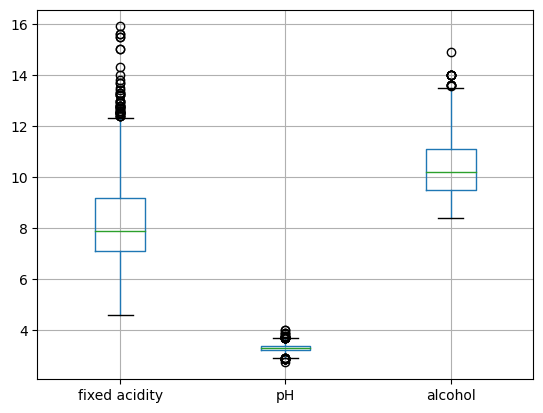

In [6]:
# Check for outliers if any and handle them

features_of_interest = ['fixed acidity', 'pH', 'alcohol']
df[features_of_interest].boxplot()
z_threshold = 3

def handle_outliers(data, feature, z_threshold):
    z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
    data_without_outliers = data[z_scores <= z_threshold]
    return data_without_outliers

for feature in features_of_interest:
    df = handle_outliers(df, feature, z_threshold)

print(df)

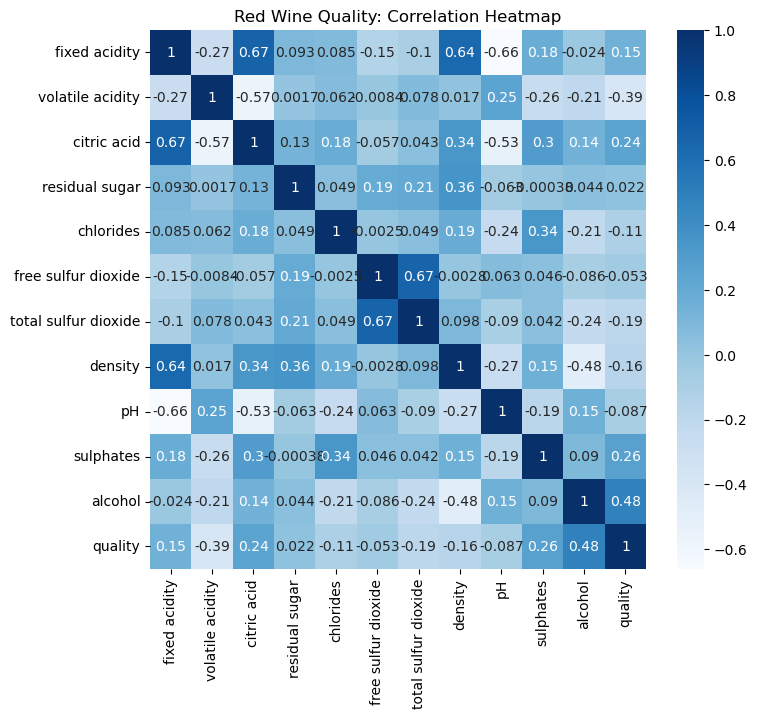

In [13]:
# Implement Correlation heatmap

corr = df.corr()
fid, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr, annot=True, ax=ax, cmap="Blues")
plt.title('Red Wine Quality: Correlation Heatmap')
plt.show()

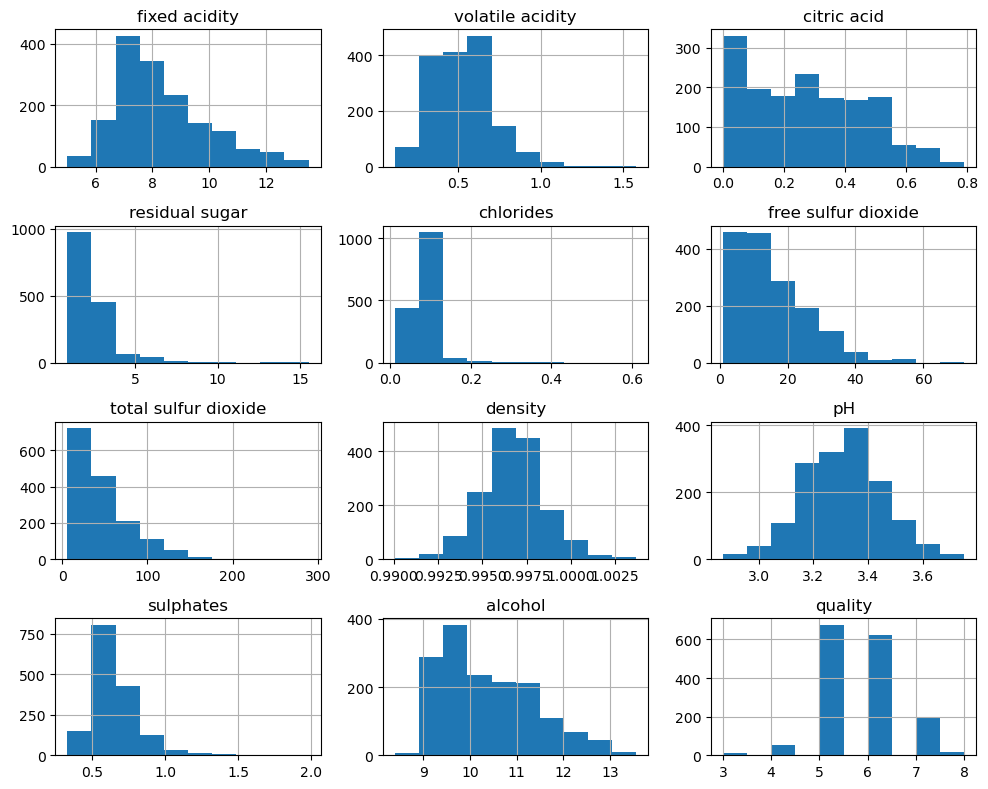

In [8]:
# Check the distribution of data using histograms

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [9]:
# Prepare the data for modeling by carrying out any steps that you think are necessary

features = df.drop('quality', axis=1)
target = df['quality']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

numerical_features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## Modeling


In [10]:
# Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice

LR = LinearRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

RR = Ridge(alpha=1.0) 
RR.fit(X_train, y_train)
ridge_pred = RR.predict(X_test)

## Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

## Model Evaluation and Calculating feature importance

In [11]:
linear_mae = mean_absolute_error(y_test, LR_pred)
linear_rmse = mean_squared_error(y_test, LR_pred, squared=False)
linear_r2 = r2_score(y_test, LR_pred)
print("Linear Regression:\t R-squared: {}, RMSE: {}, MAE: {}".format(linear_r2,linear_rmse, linear_mae))

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_pred)
print("\nRidge Regression:\t R-squared: {}, RMSE: {}, MAE: {}".format(ridge_r2, ridge_rmse, ridge_mae))

linear_coef = pd.Series(LR.coef_, index=features.columns)
print('\nLinear feature importance')
for i,v in enumerate(linear_coef):
    print('\n Importance scores: %0d, Score: %.5f' % (i,v))

print ('\n \n Ridge feature importance')
ridge_coef = pd.Series(RR.coef_, index=features.columns)
for i,v in enumerate(ridge_coef):
    print('\n Importance Scores: %0d, Score: %.5f' % (i,v))

Linear Regression:	 R-squared: 0.404201542434547, RMSE: 0.6213405329953418, MAE: 0.487656729105773

Ridge Regression:	 R-squared: 0.40525083373286686, RMSE: 0.6207931545046962, MAE: 0.487558919465322

Linear feature importance

 Importance scores: 0, Score: 0.04869

 Importance scores: 1, Score: -0.19079

 Importance scores: 2, Score: -0.21014

 Importance scores: 3, Score: 0.02234

 Importance scores: 4, Score: -1.61377

 Importance scores: 5, Score: 0.00453

 Importance scores: 6, Score: -0.00305

 Importance scores: 7, Score: -24.89999

 Importance scores: 8, Score: -0.06599

 Importance scores: 9, Score: 0.90843

 Importance scores: 10, Score: 0.29083

 
 Ridge feature importance

 Importance Scores: 0, Score: 0.01670

 Importance Scores: 1, Score: -0.20059

 Importance Scores: 2, Score: -0.23767

 Importance Scores: 3, Score: 0.01125

 Importance Scores: 4, Score: -1.08828

 Importance Scores: 5, Score: 0.00469

 Importance Scores: 6, Score: -0.00301

 Importance Scores: 7, Score:

## Feature Importance Visualization

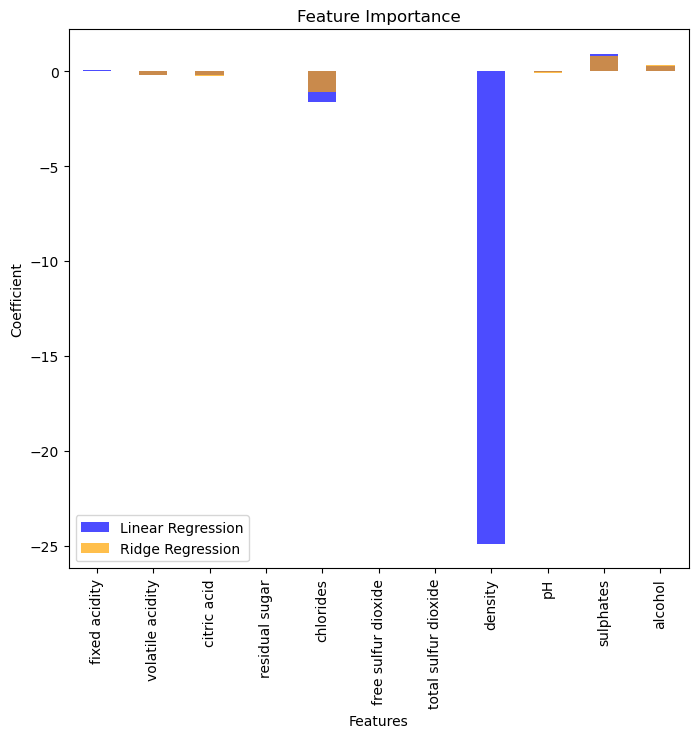

In [12]:
fig, ax = plt.subplots(figsize=(8, 7))
linear_coef.plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Linear Regression')
ridge_coef.plot(kind='bar', ax=ax, color='orange', alpha=0.7, label='Ridge Regression')
ax.set_title('Feature Importance')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient')
plt.legend()
plt.show()

## Conclusion

In conclusion, the red wine quality used two regression techiniques such as Linear Regression and Ridge Regression. The evaluation of the models state that, The R-squared values for the models were rather low, hovering around 0.40. Considering RMSE score, a deviation of 0.621 units on predicted values from the actual values are observed. In addition, the Mean Absolute Error reveals that there is quality deviation of average of 0.488 on genuine values. 

It has been found that the characteristics of acidity, pH, and sugar content substantially influenced the quality of red wine. One of the dataset's limitations, in my opinion, is that it primarily considers chemical characteristics while disregarding others, such as the kind of grape and aging. Those components also influence the wine's quality. I think there is room for more research and analysis to be done in the future that considers these aspects. 